##Instalando dependencias 


In [1]:
 !pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 134 kB 5.3 MB/s 
ERROR: Operation cancelled by user


##Imports


In [2]:
import dask.dataframe as dd
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
import matplotlib.pylab as plb
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
plb.style.use('seaborn')
plb.rc('axes', titlesize=10)


ImportError: ignored

##Importando dados

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
!ls "/content/drive/My Drive"

##Verificando dataset

In [ ]:
df = dd.read_csv('/content/drive/MyDrive/Colab Notebooks/IC/eccomerce/database/dataframes/olist_new_df.csv')

In [ ]:
df = df.compute()

In [ ]:
df.info()

In [ ]:
df.head(10)

##Preparação dos dados


In [ ]:
df.isnull().sum()

In [ ]:
df = df.astype(float)

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
colunas = ['Modelo','MAE','MAPE'] 
Metrics = pd.DataFrame(columns = colunas)

In [ ]:
Metrics

In [ ]:
##separando as variaveis dependente e independente em dois data frames
X = df.drop(['days_to_delivery'], 1)
y = df['days_to_delivery']

In [ ]:
# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(5, shuffle=True, random_state=150)

#Modelos


##Linear Regression

In [ ]:
model = LinearRegression()

my_pipeline = Pipeline(steps=[('m', model)])

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

scores = cross_validate(my_pipeline, 
                        X_train, Y_train,
                        cv=kf,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'LinearRegression',
             'MAE'        : -1*np.mean(scores['test_mae']),
             'MAPE'       : -1*np.mean(scores['test_mape'])}

Metrics = Metrics.append(resultado,ignore_index=True)

In [ ]:
Metrics

,Modelo,MAE,MAPE
0,LinearRegression,2.017889,1.681240e+15


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
mean_absolute_percentage_error(Y_test, y_pred) #Mape


1637431827178348.5

In [ ]:
median_absolute_error(Y_test, y_pred) #Mae

1.478560834628297

##Decision Tree


In [ ]:
model = DecisionTreeRegressor(random_state=150)

my_pipeline = Pipeline(steps=[('m', model)])

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

scores = cross_validate(my_pipeline, 
                        X_test, Y_test,
                        cv=kf,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'Decision Tree',
             'MAE'        : -1*np.mean(scores['test_mae']),
             'MAPE'       : -1*np.mean(scores['test_mape'])}

Metrics = Metrics.append(resultado,ignore_index=True)

In [ ]:
Metrics

,Modelo,MAE,MAPE
0,LinearRegression,2.017889,1.681240e+15
1,Decision Tree,2.134484,1.365984e+15


In [ ]:
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
mean_absolute_percentage_error(Y_test, y_pred) #Mape

985415452446942.8

In [ ]:
median_absolute_error(Y_test, y_pred) #Mae

1.0

##Random forest trees

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=0)

my_pipeline = Pipeline(steps=[('m', model)])

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

scores = cross_validate(my_pipeline, 
                        X_test, Y_test,
                        cv=kf,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'Random Forest',
             'MAE'        : -1*np.mean(scores['test_mae']),
             'MAPE'       : -1*np.mean(scores['test_mape'])}

Metrics = Metrics.append(resultado,ignore_index=True)

In [ ]:
Metrics

,Modelo,MAE,MAPE
0,LinearRegression,2.017889,1.681240e+15
1,Decision Tree,2.134484,1.365984e+15
2,Random Forest,1.676463,1.467779e+15


##XGBoost

In [ ]:
model = xgb.XGBRegressor(silent = True)

my_pipeline = Pipeline(steps=[('m', model)])

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

scores = cross_validate(my_pipeline, 
                        X_test, Y_test, #test
                        cv=kf,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'XGB',
             'MAE'        : -1*np.mean(scores['test_mae']),
             'MAPE'       : -1*np.mean(scores['test_mape'])}

Metrics = Metrics.append(resultado,ignore_index=True)

In [ ]:
Metrics

,Modelo,MAE,MAPE
0,LinearRegression,2.017889,1.681240e+15
1,Decision Tree,2.134484,1.365984e+15
2,Random Forest,1.676463,1.467779e+15
3,XGB,1.780728,1.541625e+15


##Gradient Boosting

In [ ]:
model = GradientBoostingRegressor()

my_pipeline = Pipeline(steps=[('m', model)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

scores = cross_validate(my_pipeline, 
                        X_train, Y_train, 
                        cv=cv,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'Gradient Boosting',
             'MAE'        : -1*np.mean(scores['test_mae']),
             'MAPE'       : -1*np.mean(scores['test_mape'])}

Metrics = Metrics.append(resultado,ignore_index=True)


In [ ]:
Metrics

,Modelo,MAE,MAPE
0,LinearRegression,2.017889,1.681240e+15
1,Decision Tree,2.134484,1.365984e+15
2,Random Forest,1.676463,1.467779e+15
3,XGB,1.780728,1.541625e+15
4,Gradient Boosting,1.776891,1.539782e+15


##Histogram-Based Gradient Boosting

In [ ]:
model = HistGradientBoostingRegressor()

my_pipeline = Pipeline(steps=[('m', model)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

scores = cross_validate(my_pipeline, 
                        X_test, Y_test, #test
                        cv=cv,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'HistGradientBoosting',
             'MAE'        : -1*np.mean(scores['test_mae']),
             'MAPE'       : -1*np.mean(scores['test_mape'])}

Metrics = Metrics.append(resultado,ignore_index=True)


In [ ]:
Metrics

,Modelo,MAE,MAPE
0,LinearRegression,2.017889,1.681240e+15
1,Decision Tree,2.134484,1.365984e+15
2,Random Forest,1.676463,1.467779e+15
3,XGB,1.780728,1.541625e+15
4,Gradient Boosting,1.776891,1.539782e+15
5,HistGradientBoosting,1.589251,1.345820e+15


##LightGBM

In [ ]:
# lightgbm for regression

model = LGBMRegressor()

my_pipeline = Pipeline(steps=[('m', model)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

scores = cross_validate(my_pipeline, 
                        X_test, Y_test, #test
                        cv=cv,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'Lightgbm',
             'MAE'        : -1*np.mean(scores['test_mae']),
             'MAPE'       : -1*np.mean(scores['test_mape'])}

Metrics = Metrics.append(resultado,ignore_index=True)


In [ ]:
Metrics

,Modelo,MAE,MAPE
0,LinearRegression,2.017889,1.681240e+15
1,Decision Tree,2.134484,1.365984e+15
2,Random Forest,1.676463,1.467779e+15
3,XGB,1.780728,1.541625e+15
4,Gradient Boosting,1.776891,1.539782e+15
5,HistGradientBoosting,1.589251,1.345820e+15
6,Lightgbm,1.577660,1.343412e+15


#Analisando Erros

In [ ]:
modelo = sm.OLS(y, sm.add_constant(X)).fit()
print(modelo.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:       days_to_delivery   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     648.0
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:45:08   Log-Likelihood:            -2.8331e+05
No. Observations:              111237   AIC:                         5.667e+05
Df Residuals:                  111210   BIC:                         5.669e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1602.83

Assim sendo a SQE = 1.222454e+06 ,ou seja, este é o erro médio na previsão dos dias a partir da ordem do pedido neste modelo.

In [ ]:
#soma dos quadrados de erros
sm.stats.anova_lm(ols('days_to_delivery ~ order_id ', data=df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
order_id,1.0,1.033397e-01,0.103340,0.009403,0.92275
Residual,111235.0,1.222454e+06,10.989834,NaN,NaN


##Testes de visualização de erros 

Text(0, 0.5, ' Y Pred')

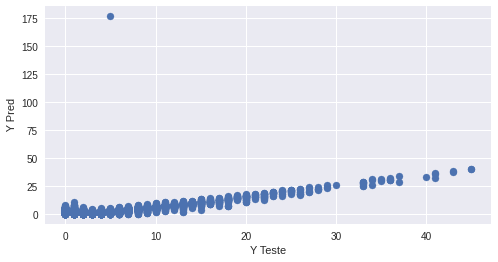

In [ ]:
plb.figure(figsize=(8, 4))
plb.scatter(Y_test,abs(Y_test - y_pred))
plb.xlabel("Y Teste")
plb.ylabel(" Y Pred")

Text(0, 0.5, ' Y Pred')

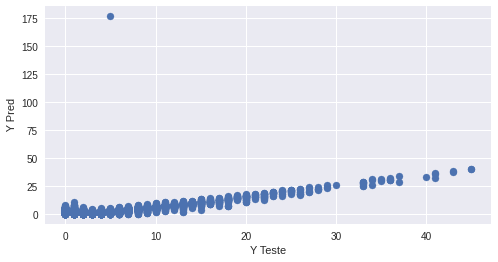

In [ ]:
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
plb.figure(figsize=(8, 4))
plb.scatter(Y_test,abs(Y_test - y_pred))
plb.xlabel("Y Teste")
plb.ylabel(" Y Pred")

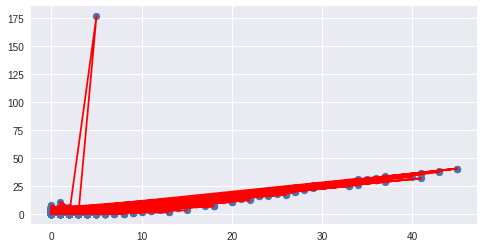

In [ ]:
model = LinearRegression()

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
plb.figure(figsize=(8, 4))
plb.scatter(Y_test,abs(Y_test - y_pred))
plb.plot(Y_test, abs(Y_test - y_pred), color="r") #x por y em red

In [ ]:
##Teste de linearidade
plot_lm_1 = plb.figure()
plot_lm_1.axes[0] = sns.residplot(modelo_ajust_y, df.columns[-1], data=df,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
                          
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

In [ ]:
##Teste de normalidade
QQ = ProbPlot(modelo_norm_resid)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')